![ML](https://i.pinimg.com/originals/17/b6/8e/17b68ed7a1a1f1e4c97aa35cc313cf75.jpg)

---

### <font color='navy'>  Instructions <font color='black'> 

* Follow a Python Project structure.
* Work with a training and validation dataset to optimize & test your trading strategies using the datasets provided in the introduction section.
* The **ML models** that we'll be using are **Logistic Regression, Support Vector Machine & XGBoost**.
* Define the **independent** and **dependent** variables to train the models, remember that you can add any technical indicator to your dataset.
* Split the `train` datasets into train/test.
* Our dependent variable should be a category that we want to predict, i.e. "Buy" and "Not buy", or "Sell" and "Not sell" for the short models, we can construct it if the next k price is over / under a certain threshold.
* For each model, fine tune all hyperparameters worth moving, then you can easily generate the True / False signals to backtest.
* Be careful when selecting a metric to fine-tune.
* For each dataset train/test pair (1d, 1h, 5m, 1m):

    * Use the buy/sell signals from the predictions.
    * Create all possible combinations of all machine learning models (2^n - 1, 7...).
    * Backtest the strategies while keeping track of the operations and cash/portfolio value time series, remember that we'll be opening long & short positions.
    * Optimize the backtest parameters (TPE, Grid Search, PSO, Genetic Algorithms, ...), stop-loss/take-profit, volume of the trade, maximizing the profit of the strategy with the training dataset, consider the bounds of each variable!
    * Select the optimal strategy and describe it thoroughly (X, y variables used, a brief description of the ML models, results).
    * Now, use the optimal strategy with the test dataset and compare it to a passive strategy.

-------

In [1]:
from machine_learning import Operation, TradingStrategy
from pasiva import calcular_rendimiento_pasiva

In [11]:
strategy = TradingStrategy('5m')

In [64]:
strategy.optimize_and_fit_models()

[I 2024-03-10 20:57:25,427] A new study created in memory with name: no-name-78a08da1-0eed-49f1-8c87-32f667c445f2
[I 2024-03-10 20:58:15,961] Trial 0 finished with value: 0.291354663036079 and parameters: {'C': 880328.4132201826, 'l1_ratio': 0.9575192766035336, 'fit_intercept': True}. Best is trial 0 with value: 0.291354663036079.
[I 2024-03-10 20:59:07,131] A new study created in memory with name: no-name-95fbe711-4b8d-40ca-b29b-98829a716a96
[I 2024-03-10 20:59:55,239] Trial 0 finished with value: 0.2985678180286437 and parameters: {'C': 2.8796555244294852, 'l1_ratio': 0.8354669488950884, 'fit_intercept': False}. Best is trial 0 with value: 0.2985678180286437.
[I 2024-03-10 21:00:45,344] A new study created in memory with name: no-name-4fe12a42-f76f-4762-9f2d-bdf8272949a7
[I 2024-03-10 21:01:34,745] Trial 0 finished with value: 0.6381597254429088 and parameters: {'booster': 'dart', 'n_estimators': 291, 'learning_rate': 0.04556085031853668, 'reg_alpha': 4.201460708441504, 'reg_lambda':

In [65]:
strategy.run_combinations()

Ejecutando con combinación de indicadores: ['Logistic']
Ejecutando con combinación de indicadores: ['XGBoost']
Ejecutando con combinación de indicadores: ['SVM']
Ejecutando con combinación de indicadores: ['Logistic', 'XGBoost']
Ejecutando con combinación de indicadores: ['Logistic', 'SVM']
Ejecutando con combinación de indicadores: ['XGBoost', 'SVM']
Ejecutando con combinación de indicadores: ['Logistic', 'XGBoost', 'SVM']
Mejor combinación de indicadores: ['Logistic', 'SVM'] con un valor de estrategia de: 959594.3958395418


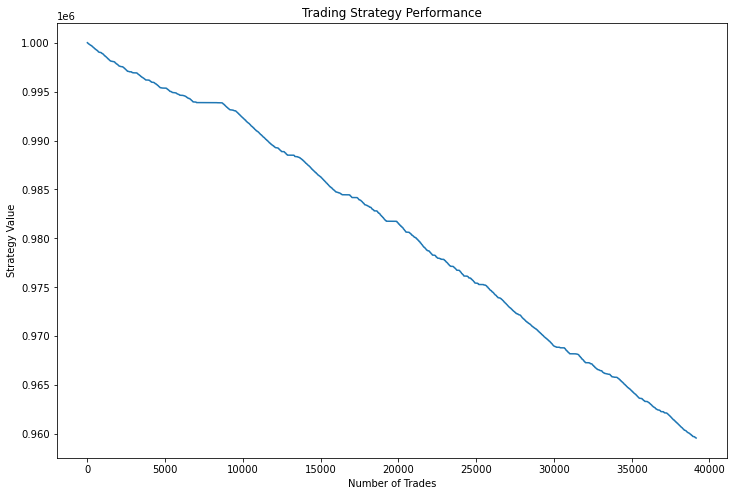

In [66]:
strategy.plot_results(best = True)

In [67]:
strategy.optimize_trade_parameters()

[I 2024-03-10 21:13:54,640] A new study created in memory with name: no-name-38f5a53f-6c01-4ce8-8264-6722143b34a4
[I 2024-03-10 21:14:13,926] Trial 0 finished with value: 943432.1541753595 and parameters: {'stop_loss_pct': 0.9032873203982188, 'take_profit_pct': 1.0912118187896256, 'n_shares': 14}. Best is trial 0 with value: 943432.1541753595.
[I 2024-03-10 21:14:33,639] Trial 1 finished with value: 793931.418781707 and parameters: {'stop_loss_pct': 0.912708837047398, 'take_profit_pct': 1.0447226539079715, 'n_shares': 51}. Best is trial 0 with value: 943432.1541753595.
[I 2024-03-10 21:14:56,410] Trial 2 finished with value: 668674.0458843092 and parameters: {'stop_loss_pct': 0.9670260717263196, 'take_profit_pct': 1.041732078827047, 'n_shares': 82}. Best is trial 0 with value: 943432.1541753595.
[I 2024-03-10 21:15:16,730] Trial 3 finished with value: 741404.1333731299 and parameters: {'stop_loss_pct': 0.9846153514999987, 'take_profit_pct': 1.0185531263496357, 'n_shares': 64}. Best is 

Mejores parámetros encontrados: {'stop_loss_pct': 0.9209330707888167, 'take_profit_pct': 1.029364749288107, 'n_shares': 1}


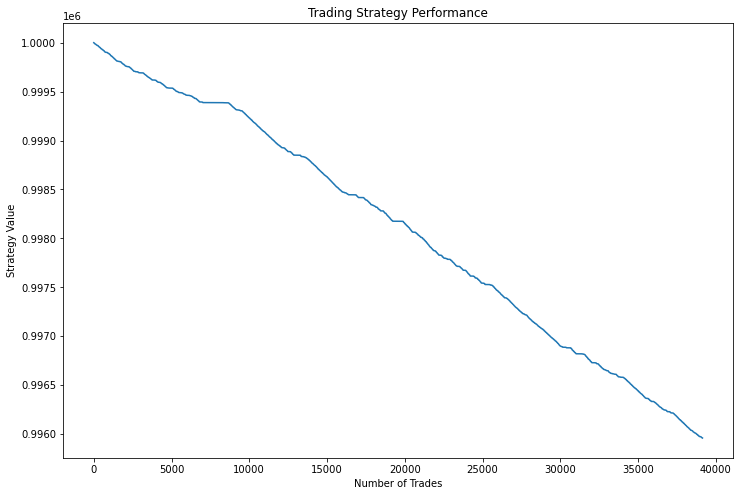

In [68]:
strategy.plot_results(best = True)

### <font color='navy'>  Analysis <font color='black'> 

## Strategy Results
Running possible combinations using Machine Learning, the best result was the combination of indicators:

['Logistic', 'SVM']

With a strategy value of: **959594.395839**
The initial fund value was **$100,000**, indicating a loss of

**-4.04%**

Both logistic regression and SVM are supervised learning algorithms primarily used for classification tasks. These models are useful when predicting membership in a class or category, rather than predicting a continuous value such as the price of a stock.

The best parameters we found for our stop loss and take profit were:

Best parameters found: {'stop_loss_pct': 0.9209330707888167, 'take_profit_pct': 1.029364749288107, 'n_shares': 1}
This indicates a risk ratio of 1.11 which is quite balanced.

## We encounter two main issues.
1. Model limitations: Logistic regression and SVM models may not be the most suitable for predicting stock performance, as they are primarily designed for binary or multiclass classification problems. When applied to regression problems, such as predicting stock performance, they may not adequately capture the complexity of stock market behavior.

2. Insufficient features: Logistic regression and SVM require significant and relevant features to make accurate predictions. If the features used to train the models do not adequately capture the variability and factors influencing stock performance, the models are likely to generate inaccurate predictions, leading to negative returns.

# Passive Strategy vs Machine Learning Strategy


The asset's return from the first closing to the last closing is: 18.54%
The strategy's return from the first closing to the last closing is: -4.04%


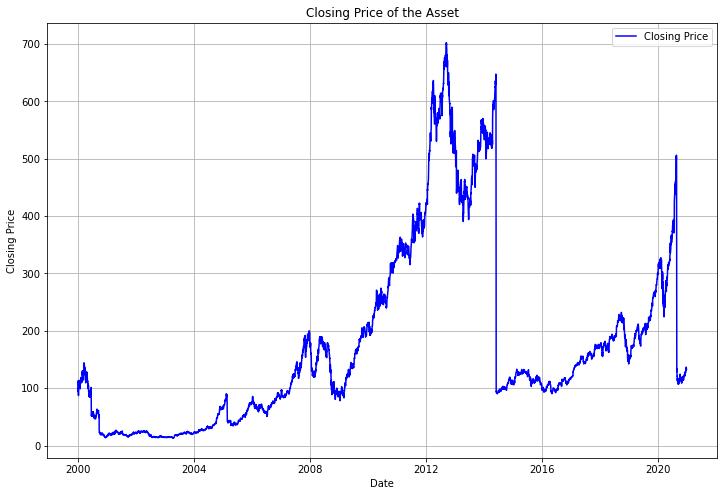

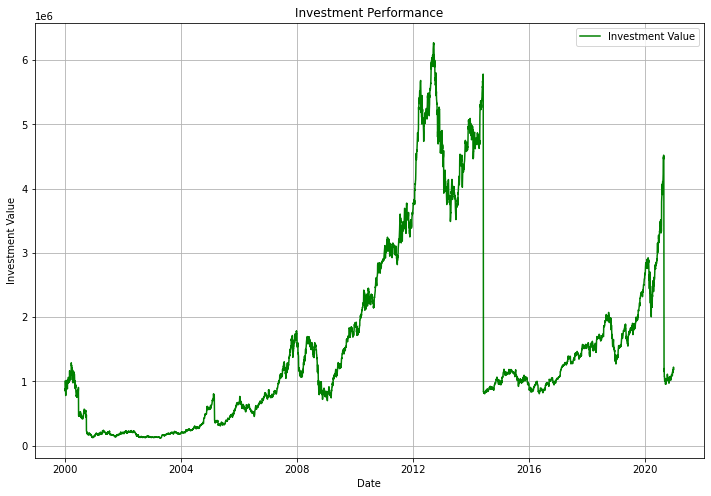

The final value of the investment: $1,185,443.41
The asset's return from the first closing to the last closing is: 18.54%
The strategy's return from the first closing to the last closing is: -4.04%
Difference between the passive strategy and the machine learning strategy is: 22.58%


In [2]:
calcular_rendimiento_pasiva()

# Conclusions
The limitations of logistic regression and SVM models lie in their inability to capture complex and non-linear relationships between input and output variables, as well as their sensitivity to the quality and quantity of training data, which can affect their ability to generalize adequately to new and unseen data.

While it is possible to apply logistic regression and SVM models to predict the performance of stocks such as AAPL, it is important to consider the limitations and challenges associated with these models. Negative returns over time may be obtained due to the inherent complexity and volatility of the stock market, as well as the limitations of the models themselves.

Although machine learning-based strategies may offer opportunities to enhance performance and optimize investment decision-making, the results of this comparison underscore the need for critical analysis and deep understanding of the market and the models used. It is essential to consider not only the potential for gains but also the ability to mitigate risks and adapt to market volatility. Combining passive and algorithmic approaches may offer a balance that leverages the strengths of each approach and leads to more consistent and satisfying long-term results.

